# Vector Kinematics

[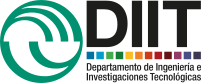](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2024 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)

---

## Position in a cartesian frame of reference
Wikimedia File:Radius vector - position vector - ortsvektor - radijvektor.svg

$$
\vec{r} = r \vec{r} = x \hat{e}_x +  y \hat{e}_y + z \hat{e}_z = (x,y,z),
$$
where $\mathbf{e}$ is the name given to a frame of reference.

## Position vector
$$
\vec{r} = r \hat{r}
$$
- **Magnitude:** $ r = |\vec{r}| \geq 0 $
- **Direction:** the unit vector $\hat{r} $ in a 3D space is decomposed into three vectors of a frame of reference $\mathbf{e}: \hat{e}_i, \hat{e}_j, \hat{e}_k$
    - If the frame of reference is cartesian, these are $\hat{e}_x, \hat{e}_y, \hat{e}_z$

## Symbolic operations in Python
- [Python](https://www.python.org/): programming language
    - interpreted: it does not compile before running each line
    - interactive: there is a return from each executed line
    - object oriented: too complex to explain... we will discuss this later
- [Sympy](https://www.sympy.org/en/index.html): it is a Python library for symbolic mathematics
    - Module [Physics: Classical Mechanics](https://docs.sympy.org/latest/modules/physics/mechanics/index.html) for mechanics

### Python libraries
There are different ways to _import_ libraries
- `import` for its whole set of functions
- `from` to select a subset

In [2]:
import sympy as sym # we import functions for symbolic calculations
from sympy.physics import mechanics as mech # from Sympy, we will use functions for mechanics and we assign the nickname "mech" for brevity

In Jupyter, this system that presents the information in blocks, this is one of code.  
To get a result and be able to use it, we have to _execute it_  (or _run it_).  
For this we can:  
- click on the _play_ icon (_execute cell_) on the left
- select the cell and press simultaneously _shift_ and _enter_, or _ctrl_ and _enter_

### Sum of vectors

If we set a frame of reference
- The $\hat{e}_i, \hat{e}_j, \hat{e}_k$ that we will use are those of the **cartesian frame of reference**: $\hat{e}_x, \hat{e}_y, \hat{e}_z$.  
    - These are the ones used by default in `mechanics`.

In [3]:
E = mech.ReferenceFrame('e') # cartesian fram of reference fixed to the ground

We create a vector

In [4]:
a_x, a_y, a_z = sym.symbols('a_x, a_y, a_z') # we have to declare what symbols will be used
a= a_x* E.x+ a_y* E.y+ a_z* E.z
a

a_x*e.x + a_y*e.y + a_z*e.z

then a different vector

In [5]:
b_x, b_y, b_z = sym.symbols('b_x, b_y, b_z')
b= b_x* E.x+ b_y* E.y+ b_z* E.z
b

b_x*e.x + b_y*e.y + b_z*e.z

and when added, the components are grouped automatically according to the unit vectors in that frame of reference.

In [6]:
c = a + b
c

(a_x + b_x)*e.x + (a_y + b_y)*e.y + (a_z + b_z)*e.z

### Assigning values to variables
We have the symbolic sum, but if we had values for the components we might be interested in a numeric result.

For that we build a **dictionary** that refers to the value of each variable.

In [7]:
values={a_x: 3, a_y: 0, a_z: 5,
         b_x: -5, b_y: -5, b_z: 7,
        } # these are lengths so in SI it's [m] unless indicated otherwise.
c.subs(values) # this substitutes variables in vector c.

- 2*e.x - 5*e.y + 12*e.z

#### Your first exercise

The first exercise can be attempted now. For this
1. Read the instructions in the exercises worksheet.
1. Create a ``new notebook`` in Google Colaboratory.
1. Copy, paste and modify the code presented so far to be useful for your own notebook.
1. Keep reading what's coming next in this theory notebook, you are going to need it for the next exercises.

### Scalar multiplication
If vector $\vec{a}$ is multiplied by a scalar, e.g. $m$, this is applied to each component.

In [8]:
m = sym.Symbol('m') # a scalar
m* a

a_x*m*e.x + a_y*m*e.y + a_z*m*e.z

### Dot product
$\vec{a} \cdot \vec{b} = a b \cos(\theta) = a_x b_x+ a_y b_y + a_z b_z $

In [9]:
a.dot(b)

a_x*b_x + a_y*b_y + a_z*b_z

#### Magnitude of a vector
It can be defined from the dot product of a vector and itself.  
$a = |\vec{a}| = \sqrt{\vec{a} \cdot \vec{a}} = \sqrt{a_x^2 + a_y^2 + a_z^2 }$

In [10]:
aProductA = a.dot(a) # it saves the result from the operation in a a variable
aProductA # prints the contents of this variable to screen

a_x**2 + a_y**2 + a_z**2

In [11]:
sym.sqrt(aProductA ) # sqrt: square root

sqrt(a_x**2 + a_y**2 + a_z**2)

### Cross product
$$
\vec{r} \times \vec{s} = 
\begin{vmatrix}
  \hat{i} & \hat{j} & \hat{k} \\
  r_i & r_j & r_k\\
  s_i & s_j & s_k
\end{vmatrix}
= (r_j s_k - r_k s_j) \hat{i} + (r_k s_i - r_i s_k) \hat{j} + (r_i s_j - r_j s_i) \hat{k} .
$$

Therefore, for vectors $\vec{a}$ and $\vec{b}$ in the frame of reference $\mathbf{e}$ using the cartesian coordinates defined previously
$$
\vec{a} \times \vec{b} = 
(a_y b_z - a_z b_y) \hat{e}_x + (a_z b_x - a_x b_z) \hat{e}_y + (a_x b_y - a_y b_x) \hat{e}_z ,
$$
but this is faster and easiest to let the computer solve it

In [12]:
a.cross(b)

(a_y*b_z - a_z*b_y)*e.x + (-a_x*b_z + a_z*b_x)*e.y + (a_x*b_y - a_y*b_x)*e.z

## Back to Physics | Velocity
$$
\vec{v}= 
\dot{\vec{r}}= \frac{d \vec{r}}{d t} =
\frac{d}{d t}\left( r \hat{r}\right) =
\frac{d r_1}{d t} \hat{e}_1 + r_1 \frac{d \hat{e}_1}{d t} +  
\frac{d r_2}{d t} \hat{e}_2 + r_2 \frac{d \hat{e}_2}{d t} +  
\frac{d r_3}{d t} \hat{e}_3 + r_3 \frac{d \hat{e}_3}{d t}  
$$

We would have six terms according to the chain rule.

In a cartesian frame of reference, $\hat{e}_x, \hat{e}_y and \hat{e}_z$ are always oriented in the same direction.
So the derivative of the unit vectors respect to $t$ is zero and the previous expression is reduced to
$$
\vec{v}= \dot{\vec{r}} = 
\frac{d x}{d t} \hat{e}_x +
\frac{d y}{d t} \hat{e}_y +
\frac{d z}{d t} \hat{e}_z =
\dot{x} \hat{e}_x +
\dot{y} \hat{e}_y +
\dot{z} \hat{e}_z
$$

Writing each symbol that is going to be differentiated as a function of time can be tedious.  
You can use a function from module `mechanics` to define *dynamic symbols*.

In [13]:
mech.init_vprinting() # notation using dot for velocity and dot dot for acceleration
x, y, z = mech.dynamicsymbols('x, y, z') # every symbol that has a dependency with time
r = x* E.x+ y* E.y+ z* E.z
v = r.dt(E) # dt: calculates the derivative of a vector respect to time in the corresponding frame
v

### The acceleration is just repeating the operation

$$
\vec{a}= 
\dot{\vec{v}}= \frac{d \vec{v}}{d t} =
\ddot{r} =
\frac{d}{d t}\left( r \hat{r}\right) =
\frac{d \dot{x}}{d t} \hat{e}_x +
\frac{d \dot{y}}{d t} \hat{e}_y +
\frac{d \dot{z}}{d t} \hat{e}_z =
\ddot{x} \hat{e}_x +
\ddot{y} \hat{e}_y +
\ddot{z} \hat{e}_z
$$

In [14]:
a = v.dt(E)
a

## What if the frame of reference is not cartesian? What if it moves?

As an example, let's merge both issues into a single problem.

### Instructions: spider over a frisbee
A frisbee has its mass $M$ uniformly distributed in a disk of radius $R$.  
While it spins keeping itself horizontal, a spider that was initially at the center, walks in a radial direction at a constant velocity $v_a$.  
1. Write expressions for the velocity and the acceleration for the spider respect to a frame of reference fixed to the ground.

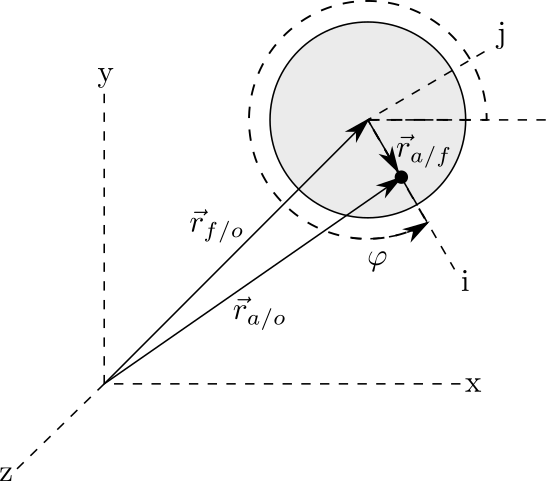

### Frisbee's position
In the figure, we see the frisbee from top to bottom, always flying horizontally.  
The position of its center of mass in the cartesian frame of reference fixed to the **ground**, which we call $\mathbf{o}$, is described by an ordered pair $(x,y)$.

In [15]:
suelo = mech.ReferenceFrame('o') # cartesian frame of reference fixed to the ground
x, y = mech.dynamicsymbols('x, y')
r_f_o = x* suelo.x + y* suelo.y # frisbee's position vector
r_f_o

### Spider's position on the frisbee
- As the frisbee spins, the angle for the unit vector $\mathbf{\hat{f}_i}$ in the frisbee's frame of reference changes.
- This angle $\varphi$ is measured respect to $\mathbf{\hat{o}_x}$ in the ground's frame of reference.
- That is, in the frisbee's frame of reference, or $\mathbf{\hat{f}}$, there is a rotation of $\varphi$ applied to the axis $\mathbf{\hat{o}_z}$.
- As any other 3D space, this frame of reference is based in three unit vectors: $\mathbf{\hat{f}_i}$, $\mathbf{\hat{f}_j}$ and $\mathbf{\hat{f}_k}$, this last one parallel to $\mathbf{\hat{o}_z}$.

In [16]:
phi = mech.dynamicsymbols('varphi')
frisbee = suelo.orientnew('f', 'Axis', (phi, suelo.z),
                         indices=('i','j','k')
                         ) # frame of reference rotated phi on the z axis of the ground's freme of reference, with three unit vectors calles i,j,k

To find the spider's position in this frame of reference, we only need to know which radius $\rho$ separates it from the origin of this frame of reference.
$$
\vec{r}_{a/f} = \rho \hat{f}_i .
$$

In [17]:
rho = mech.dynamicsymbols('rho') # radial position for the spider
r_a_f = rho* frisbee.x # in mechanics, the triplets are always x,y,z but it will use the names we gave them with indices
r_a_f

### Spider's position in the ground's frame of reference

In the figure we see that the spider's position in this frame of reference, $\vec{r}_{a/o}$, is the sum of the position of the frisbee's center of mass and another vector that describes the spider's position respect to it, $\vec{r}_{a/f}$, meaning
$$
\vec{r}_{a/o} = \vec{r}_{a/f}  +\vec{r}_{f/o}.
$$
One way to keep order when writing the addition of positions that depend on the frame of reference, is to note that the "middle" subscript, in this case $f$, "disappears" when the addition is performed.

In [18]:
r_a_o = r_a_f + r_f_o
r_a_o

### Spider's velocity

Wen calculating the derivative of $\vec{r}_{a/o}$ respect to time, we must not forget to calculate the derivatives of all terms correspondingly, following the chain rule,  
$$
\dot{\vec{r}}_{a/o}= \dot{\rho} \hat{f}_i + \rho \dot{\hat{f}}_i + \dot{x} \hat{o}_x + \dot{y} \hat{o}_y,
$$
where, as we've seen before, there is no $\dot{\hat{o}}_x$ or $\dot{\hat{o}}_y$, because the corresponding unit vectors are fixed.  
On the other hand, because $\hat{f}_i$ is not fixed, we have to determine $\dot{\hat{f}}_i$. 

#### Derivative of a unit vector respect to time
In order to understand what happens to the derivative of a unit vector respect to time, such as $\dot{\hat{f}}_i$, we analyze the derivative of a position using the chain rule
$$
\dot{\vec{r}} = \dot{r} \hat{r} + r \frac{\mathrm{d} \hat{r}}{\mathrm{d} t} ,
$$
in particular, what is the change in the unit vector $\mathrm{d} \hat{r}$ in the change of time $\mathrm{d} t$.

../01Vectorial/figuras/taylor1_12.png

In the figure on the left, in a change of time from $t_1$ to $t_2$:
- the angle for the position $\vec{r}$ changes $\Delta \phi$
- the unit vectors in these positions are not on the same line, the change from $\hat{r}(t_1)$ to $\hat{r}(t_2)$.

In the figure on the right, both unit vectors $\hat{r}$ are drawn with a common origin so
- the difference between these vectors is $\Delta \hat{r} = \hat{r}(t_2) - \hat{r}(t_1)$
- the angle between them is still $\Delta \phi$
- since the length of these vectors $\hat{r}$ is $1$, then the segment $\Delta \hat{r}$ is approximately the arc of a circumference of radius 1 in an angle $\Delta \phi$, which is oriented in the direction towards $\phi$ _increases_ ($\hat{\phi}$), meaning
$$
\Delta \hat{r} \approx 1 \times \Delta \phi \hat{\phi} = \Delta \phi \hat{\phi}, 
$$
and since we are interested in what happens after $\Delta t$, we multiply and divide by this, which allows us to understand that
$$
\Delta \hat{r} \approx \frac{\Delta \phi}{\Delta t} \Delta t \hat{\phi} = \dot{\phi} \Delta t \hat{\phi}. 
$$
Finally, we are back to what we were looking for, to determine $\frac{\mathrm{d} \hat{r}}{\mathrm{d} t}$, which, by the definition of derivative is
$$
\frac{\mathrm{d} \hat{r}}{\mathrm{d} t} = 
\lim_{\Delta t \to 0} \frac{\Delta \hat{r}}{\Delta t} = 
\dot{\phi} \hat{\phi} ,
$$
and we get the derivative of the position as
$$
\dot{\vec{r}} =
\dot{r} \hat{r} + r \frac{\mathrm{d} \hat{r}}{\mathrm{d} t} =
\dot{r} \hat{r} + r \dot{\phi} \hat{\phi} 
.
$$

#### Spider's velocity respect to the ground
The result from the previous section is applied to the spider in the frisbee's frame of reference
$$
\dot{\rho} \hat{f}_i + \rho \dot{\hat{f}_i} 
= 
\dot{\rho} \hat{f}_i + \rho \dot{\varphi} \hat{f}_j, 
$$
being $\hat{f}_j$ the direction perpendicular to $\hat{f}_i$ in which it moves at a constant speed $\dot{\rho}$.

We just need to add the terms for the velocity of the frisbee's frame of reference respect to the ground,
$$
\boxed{
\dot{\vec{r}}_{a/o} = \dot{x} \hat{o}_x + \dot{y} \hat{o}_y + \dot{\rho} \hat{f}_i + \rho \dot{\varphi} \hat{f}_j
}.
$$

#### Calculating the velocity using SymPy mechanics
The module `mechanics` of `SymPy` is able to perform the previous calculation using its function for derivatives of vectors respect to time, `dt`. 

In [19]:
v_a_o = r_a_o.dt(suelo) # the frame of reference respect to where the derivative is calculated must be stated
v_a_o

This clearly shows how the computational symbolic calculations allows us to save time and effort.

### Spider's acceleration

We now take the advantage of the same function to find the derivative of the velocity.

In [20]:
a_a_o = v_a_o.dt(suelo)
a_a_o

Performing each calculation to reach this result is tedious.  
Just for the curious one, following this is a comment on how to calculate $\dot{\hat{f}}_j$, but puting effort into this is no longer part of the job of scientist and engineers in this century when we have symbolic computations at our disposal.

../01Vectorial/figuras/taylor1_13.png

Follow the same procedure that for $\dot{\hat{f}}_i$, we see in these figures that
$$
\frac{\mathrm{d} \hat{\phi}}{\mathrm{d} t} = \lim_{\Delta t \to 0} \frac{\Delta \hat{\phi}}{\Delta t} = \dot{\phi} (- \hat{r}) .
$$